## Utilization Prediction

### Import Libraries

In [159]:
import pandas as pd
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Import Data

In [160]:
charging_sessions_data = pd.read_csv("cleaned_data.csv")
weather_data = pd.read_csv("weather_burbank_airport.csv")

charging_sessions_data

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,kWhRequested,milesRequested,minutesAvailable,requestedDeparture,hour,weekday,quarter,session_duration,idle_time,energy_ratio
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,...,25.00,100.0,463.0,"Thu, 02 Jan 2020 20:51:54 GMT",13,3,1,6.039167,1.661111,1.000640
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,...,70.00,250.0,595.0,"Thu, 02 Jan 2020 23:31:50 GMT",13,3,1,9.025278,2.337778,0.472814
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,...,8.00,20.0,60.0,"Thu, 02 Jan 2020 14:56:35 GMT",13,3,1,10.713056,8.071111,0.815125
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,...,8.00,20.0,65.0,"Thu, 02 Jan 2020 15:04:58 GMT",13,3,1,2.644722,1.331667,0.294375
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,...,16.00,40.0,504.0,"Thu, 02 Jan 2020 22:24:01 GMT",14,3,1,8.144167,3.852778,0.835938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,...,31.20,130.0,355.0,"Thu, 01 Aug 2019 00:03:04 GMT",18,2,3,5.353889,-0.016667,0.922660
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,...,6.66,20.0,455.0,"Thu, 01 Aug 2019 02:15:41 GMT",18,2,3,6.316944,3.255278,1.169219
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,...,19.98,60.0,184.0,"Wed, 31 Jul 2019 22:08:40 GMT",19,2,3,3.661667,-0.016389,0.564264
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,...,22.00,80.0,60.0,"Wed, 31 Jul 2019 20:19:47 GMT",19,2,3,5.251111,3.155833,0.526773


In [161]:
# Due to the export to csv file the right format cannot be kept
# Therefore, the columns with datetime type need to be reformatted
charging_sessions_data["connectionTime"] = pd.to_datetime(charging_sessions_data["connectionTime"])
charging_sessions_data["disconnectTime"] = pd.to_datetime(charging_sessions_data["disconnectTime"])
charging_sessions_data["doneChargingTime"] = pd.to_datetime(charging_sessions_data["doneChargingTime"])
weather_data["timestamp"] = pd.to_datetime(weather_data["timestamp"])

### Developing Prediction Model on hourly Utilization -> connectiontime to disconnectiontime in hours
1. **Feature Engineering**
* Normalizing and standardizing data **(Angela)**
* Feature encoding (transforming categorical values into numerical values) **(Coco)**
* Determining features (Correlation) **(Marietta)**
* Join charging sessions and weather data **(Coco)**
2. **Find Optimal Machine Learning Method**
* Test different ML methods and evaluate them based on one metrics
    * Polynomial Regression **(Simon)**
    * Lasso Regression **(Simon)**
    * Ridge Regression **(Marietta)**
    * Random Forest **(Angela)**
    * Neural Network **(Coco)**
* Choose the ML methods demonstrating the best performance
3. **Developing Predictive Models**
* Prediction models are developed for its charging site
* Develop predictive model using neural networks
* Develop predictive model using any other machine learning methods of choice (see Section 1.)
* Use cross-validation to train the models
* Compare predictive performance of both models on the same holdout set
* Determine the type of model the operator should employ
4. **Examples for Business Case**
* Visualize data prediction to support/ enables business case
* Make example predictions to support/ enables business case

### 1. Feature Engineering

#### 1.1. Data Standardization and Normalization

Standardizing and normalizing the data is important to improve the model performance since most models assume that the features are on a similar scale. The choice between standardization and normalization is dependent on the machine learning model. \
We have decided to standardize the data for Polynomial Regression, Lasso and Ridge Regression. Neural Networks can use either options, but normalization is often preferred. Thus, we will apply normalization to its data. \
Random Forest and other tree-based models are inherently insensitive to the scale of the features, so scaling the dataset does not impact performance. Therefore its training data does not require any scaling. \
It is important to note that the data should be scaled after splitting the dataset into training and test data to prevent data leakage and preserve the validity of the test results. Thus, this part demonstrate how data can be scaled accordingly.

##### 1.1.1. Charging Session Data Standardization and Normalization

In [162]:
charging_sessions_data.dtypes

Unnamed: 0                          int64
id                                 object
connectionTime        datetime64[ns, UTC]
disconnectTime        datetime64[ns, UTC]
doneChargingTime      datetime64[ns, UTC]
kWhDelivered                      float64
sessionID                          object
siteID                              int64
spaceID                            object
stationID                          object
timezone                           object
userID                            float64
userInputs                         object
WhPerMile                         float64
kWhRequested                      float64
milesRequested                    float64
minutesAvailable                  float64
requestedDeparture                 object
hour                                int64
weekday                             int64
quarter                             int64
session_duration                  float64
idle_time                         float64
energy_ratio                      

In [163]:
charging_sessions_data.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable',
       'requestedDeparture', 'hour', 'weekday', 'quarter', 'session_duration',
       'idle_time', 'energy_ratio'],
      dtype='object')

In [164]:
# drop non-numerical data
scaled_charging_sessions_data = charging_sessions_data[['kWhDelivered', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable']]
scaled_charging_sessions_data.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,66450.000,49187.000,49187.000,49187.000,49187.000
mean,11.788,361.207,25.320,75.082,357.983
std,10.315,101.963,20.885,62.547,198.451
min,0.501,50.000,0.000,0.000,1.000
25%,5.097,286.000,12.000,30.000,191.000
50%,9.140,350.000,19.460,50.000,360.000
75%,14.183,400.000,32.000,100.000,501.000
max,108.797,2000.000,215.320,775.000,10062.000


In [165]:
# X1 is for standardized data and X2 is for normalized data
X1 = scaled_charging_sessions_data
X2 = scaled_charging_sessions_data

# standardize data
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable'])
X1.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,66450.000,49187.000,49187.000,49187.000,49187.000
mean,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.094,-3.052,-1.212,-1.200,-1.799
25%,-0.649,-0.738,-0.638,-0.721,-0.841
50%,-0.257,-0.110,-0.281,-0.401,0.010
75%,0.232,0.380,0.320,0.398,0.721
max,9.405,16.073,9.097,11.190,48.899


In [166]:
# normalize data
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
X2 = scaleMinMax.fit_transform(X2)
X2 = pd.DataFrame(X2, columns=['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable'])
X2.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,66450.000,49187.000,49187.000,49187.000,49187.000
mean,0.104,0.160,0.118,0.097,0.035
std,0.095,0.052,0.097,0.081,0.020
min,0.000,0.000,0.000,0.000,0.000
25%,0.042,0.121,0.056,0.039,0.019
50%,0.080,0.154,0.090,0.065,0.036
75%,0.126,0.179,0.149,0.129,0.050
max,1.000,1.000,1.000,1.000,1.000


##### 1.1.2. Weather Data Standardization and Normalization

In [167]:
weather_data.dtypes

city                               object
timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                       float64
cloud_cover_description            object
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object

In [168]:
weather_data.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [169]:
# drop non-numerical data
scaled_weather_data = weather_data[['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature']]
scaled_charging_sessions_data.describe().round(3)

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,66450.000,49187.000,49187.000,49187.000,49187.000
mean,11.788,361.207,25.320,75.082,357.983
std,10.315,101.963,20.885,62.547,198.451
min,0.501,50.000,0.000,0.000,1.000
25%,5.097,286.000,12.000,30.000,191.000
50%,9.140,350.000,19.460,50.000,360.000
75%,14.183,400.000,32.000,100.000,501.000
max,108.797,2000.000,215.320,775.000,10062.000


In [170]:
# X1 is for standardized data and X2 is for normalized data
X11 = scaled_weather_data
X22 = scaled_weather_data

# standardize data
scaleStandard = StandardScaler()
X11 = scaleStandard.fit_transform(X11)
X11 = pd.DataFrame(X11, columns=['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'])
X11.describe().round(3)

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000,29224.000,29236.000,29158.000,29244.000,29218.000
mean,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.461,-4.835,-4.402,-1.279,-0.126,-2.805
25%,-0.757,-0.761,-0.660,-0.383,-0.126,-0.749
50%,-0.137,0.536,-0.111,-0.234,-0.126,-0.116
75%,0.637,0.721,0.618,0.662,-0.126,0.675
max,4.356,3.128,3.541,7.229,39.181,3.839


In [171]:
# normalize data
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
X22 = scaleMinMax.fit_transform(X22)
X22 = pd.DataFrame(X22, columns=['temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'])
X22.describe().round(3)

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000,29224.000,29236.000,29158.000,29244.000,29218.000
mean,0.361,0.607,0.554,0.150,0.003,0.422
std,0.147,0.126,0.126,0.118,0.025,0.151
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.250,0.512,0.471,0.105,0.000,0.310
50%,0.341,0.674,0.540,0.123,0.000,0.405
75%,0.455,0.698,0.632,0.228,0.000,0.524
max,1.000,1.000,1.000,1.000,1.000,1.000


#### 1.2. Feature Enconding

In [172]:
# Encoding weekday 
weather_data["is_weekday"] = np.where(weather_data['timestamp'].dt.weekday.isin([5, 6]), 0, 1)
charging_sessions_data["is_weekday"] = np.where(charging_sessions_data['connectionTime'].dt.weekday.isin([5, 6]), 0, 1)

# Encoding siteID
charging_sessions_data["siteID"] = np.where(charging_sessions_data['siteID'] == 1, 1, 0)

# Extract hour and month
weather_data["month"] = weather_data['timestamp'].dt.month
weather_data["hour"] = weather_data['timestamp'].dt.hour
charging_sessions_data["month"] = charging_sessions_data['connectionTime'].dt.month
charging_sessions_data["hour"] = charging_sessions_data['connectionTime'].dt.hour

# Encoding hour by Sin-Cos Encoding
charging_sessions_data['hour_sin'] = np.sin(2 * np.pi * charging_sessions_data['hour'] / 24)
charging_sessions_data['hour_cos'] = np.cos(2 * np.pi * charging_sessions_data['hour'] / 24)

# Encoding month by Sin-Cos Encoding

charging_sessions_data['month_sin'] = np.sin(2 * np.pi * charging_sessions_data['month'] / 12)
charging_sessions_data['month_cos'] = np.cos(2 * np.pi * charging_sessions_data['month'] / 12)

In [173]:
weather_data.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature', 'is_weekday', 'month', 'hour'],
      dtype='object')

In [174]:
# Lets group the table by month, hour and weekday to later join it in the charging data
# Therefore other attributes have to be averaged 
grouped_weather = ( weather_data
.groupby(['month', 'is_weekday', 'hour'])
.agg({
    'temperature': 'mean',   # Average temperature
    'precipitation': 'mean',      # Average precipitation
    'windspeed': 'mean', # Average windspeed
    'cloud_cover': 'mean', # Average cloud cover
    'pressure': 'mean'    # Average pressure
}).reset_index())
grouped_weather.rename(columns = {"temperature" : "avg_temperature", "precipitation": "avg_precipitation","windspeed":"avg_windspeed","cloud_cover":"avg_cloud","pressure":"avg_pressure"}, inplace = True)
grouped_weather

,month,is_weekday,hour,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure
0,1,0,0,17.640000,0.050800,8.840000,28.560000,990.364400
1,1,0,1,16.038462,0.000000,6.884615,29.653846,990.403846
2,1,0,2,14.875000,0.000000,4.625000,29.000000,991.184583
3,1,0,3,13.791667,0.010417,5.416667,30.250000,991.417500
4,1,0,4,13.040000,0.213200,6.440000,31.000000,991.588400
...,...,...,...,...,...,...,...,...
571,12,1,19,17.166667,0.006944,8.457143,31.652778,989.217917
572,12,1,20,17.729730,0.147568,9.150685,30.337838,988.302973
573,12,1,21,18.471429,0.094429,10.666667,30.771429,988.120429
574,12,1,22,18.573529,0.055882,12.029412,30.808824,988.081765


#### 1.3. Join charging sessions and weather data

In [175]:
# Now we merge weather data to charging session data on month, hour and is_weekday

merged_sessions = charging_sessions_data.merge(grouped_weather, on = ["month", "is_weekday", "hour"] )
merged_sessions = merged_sessions.drop(['spaceID','stationID','timezone','userID', 'userInputs'], axis = 1 )

Now that the session data contain all the recorded charging sessions with an addition of weather information, we have to think about how to map these to the target variable Utilization (each entry has to have a target variable)

*Note: It doesnt make sense to predict the hourly utilization for each session

In [176]:
merged_sessions

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,WhPerMile,kWhRequested,...,month,hour_sin,hour_cos,month_sin,month_cos,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,250.0,25.00,...,1,-0.258819,-0.965926,0.500000,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,280.0,70.00,...,1,-0.258819,-0.965926,0.500000,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,400.0,8.00,...,1,-0.258819,-0.965926,0.500000,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,400.0,8.00,...,1,-0.258819,-0.965926,0.500000,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373
4,84,5e28f766f9af8b70ebc91c9b,2020-01-06 13:32:15+00:00,2020-01-06 23:10:21+00:00,2020-01-06 18:56:00+00:00,11.291,1_1_194_822_2020-01-06 13:32:14.788099,1,333.0,13.32,...,1,-0.258819,-0.965926,0.500000,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,166,5c3672cff9af8b4639a8f406,2019-01-05 13:46:07+00:00,2019-01-05 20:15:55+00:00,2019-01-05 17:34:20+00:00,11.660,1_1_178_823_2019-01-05 13:46:06.967905,1,500.0,20.00,...,1,-0.258819,-0.965926,0.500000,0.866025,8.791667,0.010417,3.333333,30.291667,991.541667
66446,513,5c4faca4f9af8b5b17248743,2019-01-12 13:47:01+00:00,2019-01-12 20:04:32+00:00,2019-01-12 17:32:32+00:00,11.441,1_1_178_823_2019-01-12 13:47:01.128765,1,500.0,20.00,...,1,-0.258819,-0.965926,0.500000,0.866025,8.791667,0.010417,3.333333,30.291667,991.541667
66447,1756,5c7eebf4f9af8b1308c33d5f,2019-02-09 13:44:31+00:00,2019-02-09 20:16:13+00:00,2019-02-09 17:38:15+00:00,11.799,1_1_178_823_2019-02-09 13:44:30.547493,1,400.0,12.00,...,2,-0.258819,-0.965926,0.866025,0.500000,8.687500,0.349375,6.718750,26.781250,988.496875
66448,2371,5c86fd9af9af8b52e1fbc0ec,2019-02-23 13:42:08+00:00,2019-02-23 14:39:00+00:00,2019-02-23 14:12:47+00:00,0.825,1_1_178_828_2019-02-23 13:42:07.634889,1,NaN,NaN,...,2,-0.258819,-0.965926,0.866025,0.500000,8.687500,0.349375,6.718750,26.781250,988.496875


In [177]:
merged_sessions.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable',
       'requestedDeparture', 'hour', 'weekday', 'quarter', 'session_duration',
       'idle_time', 'energy_ratio', 'is_weekday', 'month', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos', 'avg_temperature',
       'avg_precipitation', 'avg_windspeed', 'avg_cloud', 'avg_pressure'],
      dtype='object')

#### 1.4. Determining Features (Correlation)

In [178]:
charging_sessions_data.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable',
       'requestedDeparture', 'hour', 'weekday', 'quarter', 'session_duration',
       'idle_time', 'energy_ratio', 'is_weekday', 'month', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_17491/1862450893.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_sessions[correlation_features].corr()


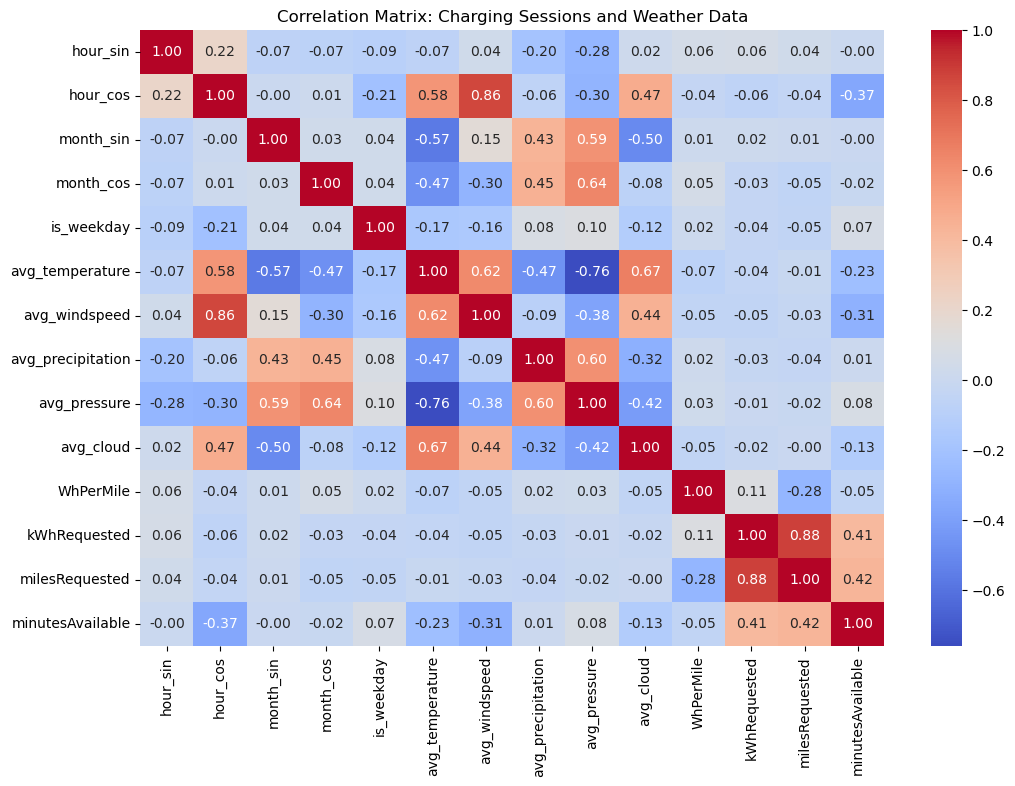

In [179]:
# choice of relecant numeric features 
correlation_features = [
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'is_weekday',
    'avg_temperature', 'avg_windspeed',  'avg_precipitation', 'avg_pressure', 'avg_cloud',
    'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable', 'doneChargingTime'  
]

# calculate the correlation 
correlation_matrix = merged_sessions[correlation_features].corr()

# plot a heatmap of the correlation 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Charging Sessions and Weather Data')
plt.show()
### 2. Find Optimal Machine Learning Method

### 2. Find Optimal Machine Learning Method

#### 2.1. Predicting Utilization value

In [180]:
# count the stations for each siteID 
stations_per_site = charging_sessions_data.groupby('siteID')['stationID'].nunique().reset_index()
stations_per_site.rename(columns={'stationID': 'total_stations'}, inplace=True)

print(stations_per_site)

   siteID  total_stations
0       0              55
1       1              52


In [181]:
# Calculate the duration of each session
charging_sessions_data['connectionTime'] = pd.to_datetime(charging_sessions_data['connectionTime'])
charging_sessions_data['disconnectTime'] = pd.to_datetime(charging_sessions_data['disconnectTime'])
charging_sessions_data['duration'] = (charging_sessions_data['disconnectTime'] - charging_sessions_data['connectionTime']).dt.total_seconds() / 3600  # duration in hours

# Summarise the loading times per hour and site
hourly_utilization = charging_sessions_data.groupby(['connectionTime', 'siteID']).agg(
    active_time=('duration', 'sum'),  # sum of the loading time in hours
).reset_index()

# Add the total number of stations for each site
hourly_utilization = hourly_utilization.merge(stations_per_site, on='siteID', how='left')

# Calculate the utilization per hour
hourly_utilization['utilization'] = hourly_utilization['active_time'] / (hourly_utilization['total_stations'])

#Check the first five results
print(hourly_utilization)

# prediciting utilization value

                 connectionTime  siteID  active_time  total_stations  \
0     2018-04-25 11:08:04+00:00       0     2.201667              55   
1     2018-04-25 13:45:10+00:00       0    11.185000              55   
2     2018-04-25 13:45:50+00:00       0     9.315278              55   
3     2018-04-25 14:37:06+00:00       0     9.307778              55   
4     2018-04-25 14:40:34+00:00       0     8.377222              55   
...                         ...     ...          ...             ...   
64861 2021-09-13 22:33:07+00:00       0     0.563333              55   
64862 2021-09-13 23:11:12+00:00       0     2.533056              55   
64863 2021-09-14 01:08:16+00:00       1     0.385556              52   
64864 2021-09-14 01:52:37+00:00       0     1.209167              55   
64865 2021-09-14 05:43:39+00:00       1     9.046944              52   

       utilization  
0         0.040030  
1         0.203364  
2         0.169369  
3         0.169232  
4         0.152313  
...      

In [182]:
merged_sessions = merged_sessions.merge(
    hourly_utilization[['connectionTime', 'siteID', 'utilization']],  
    on=['connectionTime', 'siteID'],  # same columsn for the merge
    how='left'  # all columns from charging session data should remain 
)
# check
merged_sessions.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,WhPerMile,kWhRequested,...,hour_sin,hour_cos,month_sin,month_cos,avg_temperature,avg_precipitation,avg_windspeed,avg_cloud,avg_pressure,utilization
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,250.0,25.00,...,-0.258819,-0.965926,0.5,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373,0.116138
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,280.0,70.00,...,-0.258819,-0.965926,0.5,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373,0.173563
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,400.0,8.00,...,-0.258819,-0.965926,0.5,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373,0.206020
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,400.0,8.00,...,-0.258819,-0.965926,0.5,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373,0.050860
4,84,5e28f766f9af8b70ebc91c9b,2020-01-06 13:32:15+00:00,2020-01-06 23:10:21+00:00,2020-01-06 18:56:00+00:00,11.291,1_1_194_822_2020-01-06 13:32:14.788099,1,333.0,13.32,...,-0.258819,-0.965926,0.5,0.866025,9.409639,0.131566,6.361446,28.542169,990.053373,0.185288


In [183]:
merged_sessions.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable',
       'requestedDeparture', 'hour', 'weekday', 'quarter', 'session_duration',
       'idle_time', 'energy_ratio', 'is_weekday', 'month', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos', 'avg_temperature',
       'avg_precipitation', 'avg_windspeed', 'avg_cloud', 'avg_pressure',
       'utilization'],
      dtype='object')

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_17491/1825228036.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_sessions[correlation_features].corr()


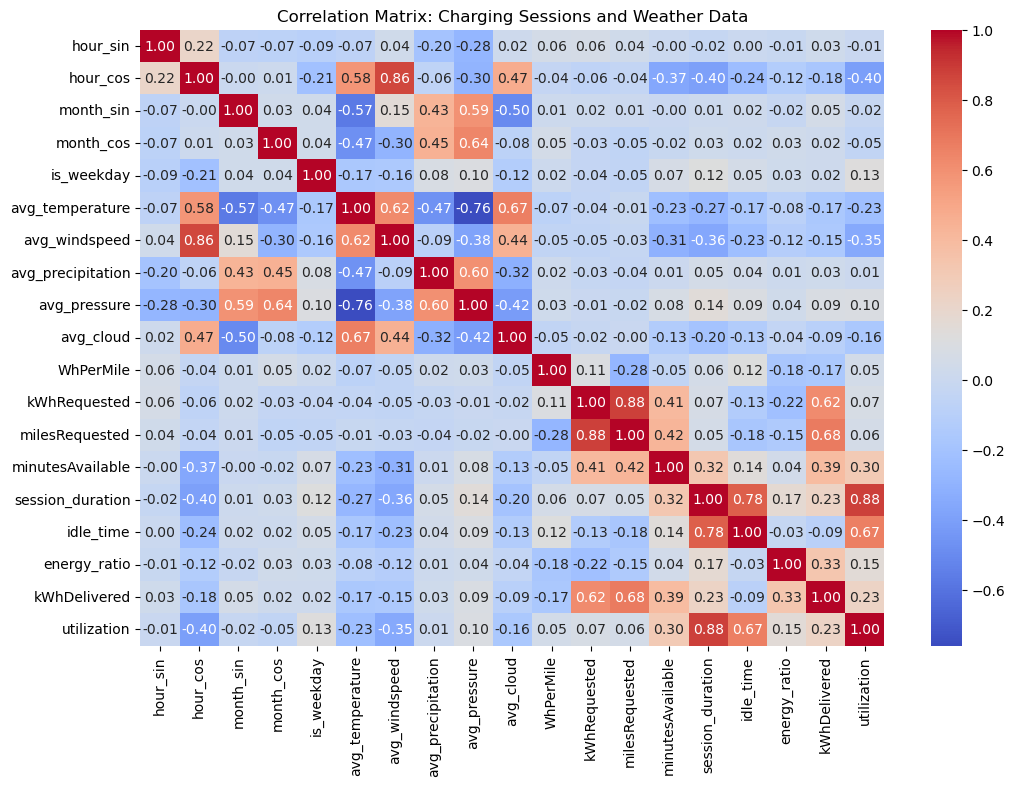

In [184]:
# choice of relecant numeric features 
correlation_features = [
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'is_weekday',
    'avg_temperature', 'avg_windspeed',  'avg_precipitation', 'avg_pressure', 'avg_cloud',
    'WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable', 'doneChargingTime',
    'session_duration', 'idle_time', 'energy_ratio', 'kWhDelivered', 'utilization' 
]

# calculate the correlation 
correlation_matrix = merged_sessions[correlation_features].corr()

# plot a heatmap of the correlation 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Charging Sessions and Weather Data')
plt.show()
### 2. Find Optimal Machine Learning Method

In [185]:
merged_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66450 entries, 0 to 66449
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Unnamed: 0          66450 non-null  int64              
 1   id                  66450 non-null  object             
 2   connectionTime      66450 non-null  datetime64[ns, UTC]
 3   disconnectTime      66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime    62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered        66450 non-null  float64            
 6   sessionID           66450 non-null  object             
 7   siteID              66450 non-null  int64              
 8   WhPerMile           49187 non-null  float64            
 9   kWhRequested        49187 non-null  float64            
 10  milesRequested      49187 non-null  float64            
 11  minutesAvailable    49187 non-null  float64            
 12  requestedDeparture  49187 non-nu

#### 2.2. Polynomial Regression

In [186]:
# Remove rows with NaN in the target variable (y_poly)
merged_sessions = merged_sessions.dropna(subset=['minutesAvailable'])

# Define Features and Target
X_poly = merged_sessions[['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 
                          'is_weekday', 'avg_temperature', 'avg_windspeed', 
                          'avg_precipitation', 'avg_pressure', 'avg_cloud']]
y_poly = merged_sessions['minutesAvailable']  # Example target (e.g., utilization time in minutes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Predictions
y_pred_train = linear_model.predict(X_train_poly)
y_pred_test = linear_model.predict(X_test_poly)

# Evaluate Model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)




Train R²: 0.16349451448156416
Test R²: 0.10957135312846733
Train MSE: 31372.744738996156
Test MSE: 41753.55306109059


#### 2.3. Lasso Regression

In [187]:
# Define Features and Target
X_lasso = merged_sessions[['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 
                           'is_weekday', 'avg_temperature', 'avg_windspeed', 
                           'avg_precipitation', 'avg_pressure', 'avg_cloud']]
y_lasso = merged_sessions['minutesAvailable']  # Example target (e.g., utilization time in minutes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up a grid search for Lasso with different alpha values
lasso = Lasso(max_iter=10000, random_state=42)
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Test alpha values from 0.0001 to 10
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Train the Lasso model with the best alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
best_lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)



Best Alpha: 0.05689866029018299
Train R²: 0.14924949487364447
Test R²: 0.10450104054739373
Train MSE: 31906.9974984796
Test MSE: 41991.30772692932


#### 2.4. Ridge Regression

In [188]:
# only keep numeric data for the regression
merged_sessionsRidge = merged_sessions.select_dtypes(include=['number']) 
print(merged_sessionsRidge.dtypes)

Unnamed: 0             int64
kWhDelivered         float64
siteID                 int64
WhPerMile            float64
kWhRequested         float64
milesRequested       float64
minutesAvailable     float64
hour                   int64
weekday                int64
quarter                int64
session_duration     float64
idle_time            float64
energy_ratio         float64
is_weekday             int64
month                  int64
hour_sin             float64
hour_cos             float64
month_sin            float64
month_cos            float64
avg_temperature      float64
avg_precipitation    float64
avg_windspeed        float64
avg_cloud            float64
avg_pressure         float64
utilization          float64
dtype: object


In [189]:
#temporarly 
from sklearn.impute import SimpleImputer

# Select Features and Target
# Define target variable
target = 'utilization'

# Define features 
XRidge = merged_sessionsRidge[['session_duration', 'idle_time']] # features
yRidge = merged_sessionsRidge['utilization'] # target variable

#temporarly until all NaN values are filled or deleted
imputer = SimpleImputer(strategy='mean')  # Alternativen: 'median', 'most_frequent', etc.
XRidge = imputer.fit_transform(XRidge)

# split dataset into training and testing sets
# 30% test data and 70% training data
X_train, X_test, y_train, y_test = train_test_split(XRidge, yRidge, test_size=0.3, random_state=42)

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
# Ridge-Regression Model
ridge = Ridge(max_iter=10000, random_state=42)

# Set up a grid search for Ridge with different alpha values
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Test alpha values from 0.0001 to 10
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Best alpha value
best_alphaRidge = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alphaRidge}")

# Train the Ridge model with the best alpha
best_ridge = Ridge(alpha=best_alphaRidge, max_iter=10000, random_state=42)
best_ridge.fit(X_train, y_train)

# Predictions
y_pred_train = best_ridge.predict(X_train)
y_pred_test = best_ridge.predict(X_test)

Best Alpha: 10.0


In [191]:
# Evaluation of the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train R²: 0.7115993214659236
Test R²: 0.726540217723643
Train MSE: 0.0029202972668292233
Test MSE: 0.0026760155293345167


R2 describes how much of the variability in the target variables is explained by the model.
Train R2=0.888 and Test R2=0.880 show that the model works very well and explains almost 88-89% of the variance in the data.

The MSE shows how far the predictions of the model deviate on average from the actual value.
Test MSE (0.000837) is only slightly higher than the Train MSE (0.000839), indicating that the model shows no signs of overfitting or underfitting.

#### 2.5. Random Forest

In [192]:
# merge datasets
merged_data = pd.merge(charging_sessions_data, weather_data) # pd.merge(charging_sessions_data, weather_data, on=['timestamp']

# Select Features and Target
# Define target variable
target = 'utilization'

# Define features (excluding the target and identifiers)
X = merged_data.drop(['utilization'], axis="columns") # features
y = merged_data['utilization'] # target variable

# split dataset into training and testing sets
# 30% test data and 70% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train model on 100 random trees
rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42) # we select boostrapp, i.e. we use bagging
rf_model.fit(X_train,y_train)

KeyError: "['utilization'] not found in axis"

In [ ]:
# predict on test set
y_pred = model.predict(X_test)

# evaluate performance based on metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # good performance = close to 1

NameError: name 'model' is not defined

In [ ]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300], # no of trees
    'max_depth': [10, 20, 30], # depth of each tree
    'min_samples_split': [2, 5, 10], # no required to split
    'min_samples_leaf': [1, 2, 4] # min samples required to node
}

rf_model_cv = GridSearchCV(estimaro=rfr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', end_jobs = -1)
rf_model_cv.fit(X_train, y_train)

In [ ]:
# predict on test set
y_pred = model.predict(X_test)

# evaluate performance based on metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#### 2.5. Neural network

The MLPRegressor (Multi-Layer Perceptron Regressor) in scikit-learn is a neural network model that implements a feedforward artificial neural network with fully connected layers, trained using backpropagation.

For this method we decided to include more features 

In [196]:
from sklearn.neural_network import MLPRegressor

# Conduct train test split
from sklearn.model_selection import train_test_split

# Split into train, test, and holdout
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 40% temp (test + holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp 50/50

# Scale train data
NN_features = ["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed", "hour_sin", "hour_cos"]
X_NN_scale = X_train[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_train[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_train = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

# scale test data
X_NN_scale = X_test[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_test[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_test = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

# scale holdout data
X_NN_scale = X_holdout[["siteID","WhPerMile","kWhRequested","minutesAvailable","is_weekday","session_duration","idle_time","avg_temperature","avg_precipitation","avg_windspeed"]]
X_NN_exclude = X_holdout[["hour_sin","hour_cos"]]

# Scaling the chosen deatures except for hour_sin and hour_cos (these are naturally in scale)
X_NN_scaled = scaleStandard.fit_transform(X_NN_scale)
X_holdout = pd.DataFrame(
    np.hstack([X_NN_scaled, X_NN_exclude.values]),  # Combine scaled and unscaled features
    columns=NN_features # Keep the column names
)

# Initialize the hyperparameters
mlp = MLPRegressor(
    hidden_layer_sizes=(100,50),  # Single hidden layer with 100 neurons
    activation='relu',          
    solver='adam',               # default
    max_iter=500,               # Maximum number of iterations
    random_state=42,            
    learning_rate='constant',   
    learning_rate_init=0.01   # Initial learning rate
)
mlp.fit(X_train, y_train)

# Predictions
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Train MSE:", train_mse)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)

#y_pred_hold = mlp.predict(X_holdout)
#hold_r2 = r2_score(y_holdout, y_pred_hold)
#hold_mse = mean_squared_error(y_holdout, y_pred_hold)
#print("Holdout R²:", hold_r2)
#print("Holdout MSE:", hold_mse)

Train R²: 0.8023983474786682
Train MSE: 0.002141911655759169
Test R²: 0.8292113650110047
Test MSE: 0.0014466526341198392


### 3. Developing Predictive Models

#### 3.1. Train Models

#### 3.2. Cross-Validation

#### 3.3. Performance Evaluation

### 4. Examples for Business Case

#### 4.1. Visualizing Prediction Data

#### 4.2. Example Prediction